In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import networkx as nx
import os

In [2]:
def TodaysDate():
        
    Today = datetime.date.today()
    TodaysDate = Today.strftime('%d%b%Y')
    
    return TodaysDate

In [3]:
def DNACodingSequence(DNASequence, QualityScoreSequence, StartSequence, StopSequence):
#utilises ONLY ONE StopSequence, returns ONLY ONE CodingSequence
    
    QualityScoreString = """!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~"""
    ThresholdQualityScore = 29 # ThresholdQualityScore must be between 0 and 93
    ThresholdQualityString = QualityScoreString[ThresholdQualityScore:]
    
    MinLength = 24
    MaxLength = 240
            
    StartIndex = DNASequence.find(StartSequence) + len(StartSequence)
    StopIndex = DNASequence.rfind(StopSequence)
    CodingSequence =  DNASequence[StartIndex:StopIndex]
    if MinLength <= len(CodingSequence) and len(CodingSequence) <= MaxLength and len(CodingSequence)%3 == 0:
        for Character in QualityScoreSequence[StartIndex:StopIndex]:
            if Character not in ThresholdQualityString:
                return None
        return str(CodingSequence)

In [4]:
def Translation(CodingSequence):
#translates DNA sequence

    TranslationCode = {
                    'AAA':'K','AAC':'N','AAG':'K','AAU':'N',
                    'ACA':'T','ACC':'T','ACG':'T','ACU':'T',
                    'AGA':'R','AGC':'S','AGG':'R','AGU':'S',
                    'AUA':'I','AUC':'I','AUG':'M','AUU':'I',
                    
                    'CAA':'Q','CAC':'H','CAG':'Q','CAU':'H',
                    'CCA':'P','CCC':'P','CCG':'P','CCU':'P',
                    'CGA':'R','CGC':'R','CGG':'R','CGU':'R',
                    'CUA':'L','CUC':'L','CUG':'L','CUU':'L',
                    
                    'GAA':'E','GAC':'D','GAG':'E','GAU':'D',
                    'GCA':'A','GCC':'A','GCG':'A','GCU':'A',
                    'GGA':'G','GGC':'G','GGG':'G','GGU':'G',
                    'GUA':'V','GUC':'V','GUG':'V','GUU':'V',
                    
                    'UAA':'#','UAC':'Y','UAG':'*','UAU':'Y',
                    'UCA':'S','UCC':'S','UCG':'S','UCU':'S',
                    'UGA':'&','UGC':'C','UGG':'W','UGU':'C',
                    'UUA':'L','UUC':'F','UUG':'L','UUU':'F'
                        }
    # UAA (ochre) — #
    # UAG (amber) — *
    # UGA (opal) — &
                    
    TranscriptionCode = {'A':'A','C':'C','G':'G','T':'U','U':'T'}
      
    RNASequence = ''
    for Nucleotide in CodingSequence:
        RNASequence += TranscriptionCode.get(Nucleotide,'X')
    #converts DNA to RNA
    #print RNASequence
        
    Peptide = ''
    while len(RNASequence) != 0:
        Peptide += TranslationCode.get(RNASequence[0:3],'Do not fuck with me!')
        RNASequence = RNASequence[3:]
    return Peptide

In [5]:
def SingleSelectionRoundSummary(fastqFileLocation):
#returns a list of lists with peptide-sequences and their frequencies, sorted by frequency in descending order
    
    RawDataFile = open(fastqFileLocation, 'r')
    Lines = RawDataFile.readlines()
    RawDataFile.close
    
    #StartSequence = 'ATG' # Met codon
    #StopSequence = 'TGCGGCAGC'# Akane seams to have trimmed siquences
    #StopSequence = 'TAG' # amber stop codon
    
    StartSequence = 'TAATACGACTCACTATAGGGTTAACTTTAAGAAGGAGATATACATATG'    # NNK - T7g10M.F48 
    StopSequence = 'TGCGGCAGCGGCAGCGGCAGCTAGGACGGGGGGCGGAAA' #NNK - CGS3an13.R39 
    #StartSequence = 'TAATACGACTCACTATAGGGTTGAACTTTAAGTAGGAGATATATCCATG'   #NNU - T7-CH-F49
    #StopSequence = 'TGTGGGTCTGGGTCTGGGTCTTAGGACGGGGGGCGGAAA'  #NNU - CGS3-CH-R39
    
    SingleSelectionRoundSummary = {}
    #creates empty SingleSelectionRoundSummary dictionary to store the results from a single round of selection
    #SingleSelectionRoundSummary = {PeptideY:    {CodingSequence_YZ:    Occurrence_YZ}}
        
    #populates SingleSelectionRoundSummary dictionary with the results from a single round of selection
    for i,Line in enumerate(Lines):
        if StartSequence in Line and StopSequence in Line:
            CodingSequence = DNACodingSequence(Line, Lines[i + 2], StartSequence, StopSequence)
            if CodingSequence != None:
                PeptideSequence = Translation(CodingSequence)
                if PeptideSequence not in SingleSelectionRoundSummary:
                    SingleSelectionRoundSummary[str(PeptideSequence)] = {str(CodingSequence) : 1}
                else:
                    if CodingSequence not in SingleSelectionRoundSummary[str(PeptideSequence)]:
                        SingleSelectionRoundSummary[str(PeptideSequence)][str(CodingSequence)] = 1
                    else:
                        SingleSelectionRoundSummary[str(PeptideSequence)][str(CodingSequence)] += 1

    return SingleSelectionRoundSummary

In [6]:
def HammingDistance(Sequence1, Sequence2):
    
    if len(Sequence1) < len(Sequence2):
        Sequence1 = Sequence1 + (len(Sequence2) - len(Sequence1)) * '%'
    elif len(Sequence1) > len(Sequence2):
        Sequence2 = Sequence2 + (len(Sequence1) - len(Sequence2)) * '%'
    
    HammingDistance = 0
    for i in range(len(Sequence1)):
        if Sequence1[i] == Sequence2[i]:
            HammingDistance = HammingDistance
        else:
            HammingDistance = HammingDistance + 1
            
    return HammingDistance

In [7]:
def HammingDistanceBasedFormating(Sequence1, Sequence2):
    
    if len(Sequence1) < len(Sequence2):
        Sequence1 = Sequence1 + (len(Sequence2) - len(Sequence1)) * '-'
    elif len(Sequence1) > len(Sequence2):
        Sequence2 = Sequence2 + (len(Sequence1) - len(Sequence2)) * '-'
    
    HammingDistance = 0
    FormatedSequence2 = ''
    for i in range(len(Sequence1)):
        if Sequence1[i] == Sequence2[i]:
            FormatedSequence2 += Sequence2[i].lower()
            HammingDistance = HammingDistance
        else:
            FormatedSequence2 += Sequence2[i]
            HammingDistance = HammingDistance + 1            
    return FormatedSequence2

In [8]:
def CompleteSelectionSummary(fastqDataFolderLocation):
# returns a SelectionSummary dictionary with the following structure
# SelectionSummary = {SelectionRound_X:    {PeptideXY:    {CodingDNA_XYZ:    Occurrence_XYZ}}}

    CompleteSelectionSummary = {}
    # creates empty SelectionSummary dictionary to store the results from all the rounds of selection

    for file in os.listdir(fastqDataFolderLocation):
        
        FileLocation = os.path.join(fastqDataFolderLocation, file)
          
        if file.endswith('.fastq'): # this conditional is necessary; without it some shit appears in the beginning of the file list
            RoundNumberFirstDigit = file[file.find('.')-2]
            RoundNumberSecondDigit = file[file.find('.')-1]
            if RoundNumberFirstDigit == '0':
                RoundNumber = int(RoundNumberSecondDigit)
                #print RoundNumber
            elif RoundNumberFirstDigit != '0':
                RoundNumber = int(file[file.find('.')-2 : file.find('.')])
                #print RoundNumber
        #(1.A) extracts the round number from the file name (file name should have two digit number before full stop — '00.') 
                
            SelectionRoundSummary = SingleSelectionRoundSummary(FileLocation)
            #(1.B) extracts single round results 
                    
            CompleteSelectionSummary[RoundNumber] = SelectionRoundSummary
            #(1.C) populate ConcatenatedResultsList
            #print ConcatenatedResultsList
            
    return CompleteSelectionSummary

In [9]:
def PeptidesOccurrences_BY_Round(fastqDataFolderLocation):
    SelectionSummary = CompleteSelectionSummary(fastqDataFolderLocation)
    
    PeptidesOccurrences_BY_Round = {}
    for Round in SelectionSummary:
        PeptidesOccurrences_IN_Round = {}
        for Peptide in SelectionSummary[Round]:
            PeptidesOccurrences_IN_Round[Peptide] = sum(SelectionSummary[Round][Peptide].values())
        PeptidesOccurrences_BY_Round[Round] = PeptidesOccurrences_IN_Round
        
    return PeptidesOccurrences_BY_Round

In [10]:
def DNAsOccurrences_BY_Round(fastqDataFolderLocation):
    SelectionSummary = CompleteSelectionSummary(fastqDataFolderLocation)
    
    DNAsOccurrences_BY_Round = {}
    for Round in SelectionSummary:
        DNAsOccurrences_IN_Round = {}
        for Peptide in SelectionSummary[Round]:
            for DNA in SelectionSummary[Round][Peptide]:
                DNAsOccurrences_IN_Round[DNA] = SelectionSummary[Round][Peptide][DNA]
        DNAsOccurrences_BY_Round[Round] = DNAsOccurrences_IN_Round

    return DNAsOccurrences_BY_Round

In [11]:
def TotalReads_BY_Round(fastqDataFolderLocation):
    SelectionSummary = CompleteSelectionSummary(fastqDataFolderLocation)
    Peptides_BY_Round = PeptidesOccurrences_BY_Round(fastqDataFolderLocation)
    
    TotalReads_BY_Round = {}
    for Round in SelectionSummary:
        TotalReads_BY_Round[Round] = sum(Peptides_BY_Round[Round].values())
        
    return TotalReads_BY_Round

In [12]:
def BaseRoundSortedPeptidesList(fastqDataFolderLocation, BaseRoundIndex):
    Peptides_BY_Round = PeptidesOccurrences_BY_Round(fastqDataFolderLocation)  
            
    PeptidesOccurrencesInBaseRound = Peptides_BY_Round[BaseRoundIndex]
    BaseRoundSortedPeptidesList = sorted(PeptidesOccurrencesInBaseRound, key = PeptidesOccurrencesInBaseRound.get, reverse = True)
    
    return BaseRoundSortedPeptidesList

In [13]:
def BaseRoundSortedDNAsList(fastqDataFolderLocation, BaseRoundIndex):
    DNAs_BY_Round = DNAsOccurrences_BY_Round(fastqDataFolderLocation)  
            
    DNAsOccurrences_IN_BaseRound = DNAs_BY_Round[BaseRoundIndex]
    BaseRoundSortedDNAsList = sorted(DNAsOccurrences_IN_BaseRound, key = DNAsOccurrences_IN_BaseRound.get, reverse = True)
    
    return BaseRoundSortedDNAsList

In [14]:
def DNAClonesOccurrences_BY_Round_BY_Peptide(fastqDataFolderLocation):
    SelectionSummary = CompleteSelectionSummary(fastqDataFolderLocation)
    
    DNAClonesOccurrences_BY_Round_BY_Peptide = {}
    for Round in SelectionSummary:
        DNAClonesOccurrences_BY_Peptide = {}
        for Peptide in SelectionSummary[Round]:
            DNAClonesOccurrences_BY_Peptide[Peptide] = len(SelectionSummary[Round][Peptide])
        DNAClonesOccurrences_BY_Round_BY_Peptide[Round] = DNAClonesOccurrences_BY_Peptide
        
    return DNAClonesOccurrences_BY_Round_BY_Peptide

In [15]:
def PeptidesAppearances_BY_Round(BaseRoundSortedPeptidesList, PeptidesOccurrences_BY_Round):
    
    PeptidesAppearances_BY_Round = {}
    
    for Peptide in BaseRoundSortedPeptidesList:
        PeptidesAppearances_BY_Round[Peptide] = []
        for Round in PeptidesOccurrences_BY_Round:
            if Peptide in PeptidesOccurrences_BY_Round[Round]:
                PeptidesAppearances_BY_Round[Peptide] += [Round]
    return PeptidesAppearances_BY_Round

In [16]:
def DNAsAppearances_BY_Round(BaseRoundSortedDNAsList, DNAsOccurrences_BY_Round):
    
    DNAsAppearances_BY_Round = {}
    
    for DNA in BaseRoundSortedDNAsList:
        DNAsAppearances_BY_Round[DNA] = []
        for Round in DNAsOccurrences_BY_Round:
            if DNA in DNAsOccurrences_BY_Round[Round]:
                DNAsAppearances_BY_Round[DNA] += [Round]
    return DNAsAppearances_BY_Round

In [17]:
def PeptidesSummaryDNAPerspectiveReport(fastqDataFolderLocation, BaseRoundIndex, PeptidesSummaryFileName):
    
    # to extract TodaysDate
    today = TodaysDate()
    
    # to collect DNAs-based summary information By_Round
    DNAs_BY_Round = DNAsOccurrences_BY_Round(fastqDataFolderLocation)
    TotalDNAs_BY_Round = TotalReads_BY_Round(fastqDataFolderLocation)
    BaseRoundSortedDNAs = BaseRoundSortedDNAsList(fastqDataFolderLocation, BaseRoundIndex)
    DNAsAppearances = DNAsAppearances_BY_Round(BaseRoundSortedDNAs, DNAs_BY_Round)
    
    # to collect Peptides-based summary information By_Round
    Peptides_BY_Round = PeptidesOccurrences_BY_Round(fastqDataFolderLocation)
    TotalPeptides_BY_Round = TotalReads_BY_Round(fastqDataFolderLocation)
    BaseRoundSortedPeptides = BaseRoundSortedPeptidesList(fastqDataFolderLocation, BaseRoundIndex)
    PeptidesAppearances = PeptidesAppearances_BY_Round(BaseRoundSortedPeptides, Peptides_BY_Round)
    
    SelectionSummary = CompleteSelectionSummary(fastqDataFolderLocation)
    SortedRoundsList = sorted(SelectionSummary.keys())    
    
    # to create a disjoint graph (Forest), based on DNAs in the BaseRound (joint subgraphs are the Trees and the unique DNA sequences are the Leaves)
    BaseRoundDNAsForest = nx.Graph()
    # to add nodes (Leaves, unique DNA sequences) to the BaseRoundDNAsForest disjoint graph
    BaseRoundDNAsForest.add_nodes_from(BaseRoundSortedDNAs)
    # to add edges (Twigs, DNA-to-DNA connections based on the hamming distance between unique DNA sequences) to the BaseRoundDNAsForest so that disjoint graphs (stand alone Trees) can be identified
    UsedNodes = []
    for DNA1 in BaseRoundSortedDNAs:
        UsedNodes += [DNA1]
        for DNA2 in BaseRoundSortedDNAs:
            if DNA2 not in UsedNodes and HammingDistance(DNA1, DNA2) == 1:
                BaseRoundDNAsForest.add_edge(DNA1,DNA2,
                                                MutationsNumber = 1)
    # to extract individual joint subgraphs (stand alone Trees) from the disjoint graph (Forest)
    BaseRoundDNAsTrees = list(nx.connected_component_subgraphs(BaseRoundDNAsForest, copy = True))
    
    # to create a PeptideSummaryDNAPerspectiveCSV file
    PeptidesSummaryFileNameCSV =  str(today) + 'PeptideFamiliesSummary' + PeptidesSummaryFileName + '.csv'
    PeptidesSummaryFile = open(PeptidesSummaryFileNameCSV, 'w')
    
    # to convert list of DNAs Trees into a list of Peptides Trees Leaves
    PeptidesTreesLeaves = []
    for DNAsTree in BaseRoundDNAsTrees:
        PeptideLeaves = []
        for DNA in DNAsTree:
            Peptide = Translation(DNA)
            if Peptide not in PeptideLeaves:
                PeptideLeaves += [Peptide]
        PeptidesTreesLeaves += [PeptideLeaves]
    # to sort the resulting list of lists from the largest to smallest
    PeptidesTreesLeaves.sort(key = len, reverse = True)
    
    # to fix the coordinates of the origin of the graph
    Positions = {}
    X_0_Coordinate = 1
    Y_0_Coordinate = 0
    Y_X0_Coordinate = 0
    
    TreesXCoordinates = []
        
    
    # Create a figure of size 8x6 inches, 500 dots per inch
    plt.figure(figsize = (8, 6),
               dpi = 500)
    # Create 'ggplot' style
    plt.style.use('fivethirtyeight')
    # Create a new subplot from a grid of 1x1
    plt.subplot(1, 1, 1)
    
    #to introduce PeptideFamilyCounter
    MultiplePeptideFamilyCounter = 0
    #to introduce SinglePeptideFamilyCounter
    SinglePeptideFamilyCounter = 0
    #to introduce PeptideFamilySize
    PeptideTreeSize = []
    
    
    # to create a tree for each set of Peptides Trees Leaves 
    for PeptideLeaves in PeptidesTreesLeaves:
        
        PeptideTree = nx.Graph()
        # to convert each Peptide (Leave) into a node of a Peptide graph (PeptideLeave on a PeptideTree)
        
        for Peptide in PeptideLeaves:
            PeptideTree.add_node(Peptide,
                                        Occurrence = Peptides_BY_Round[BaseRoundIndex][Peptide],
                                        FirstAppearance = min(PeptidesAppearances[Peptide]))
        # to join the Peptide nodes of a graph by edges (Twigs)
        for Peptide1 in PeptideLeaves:
            for Peptide2 in PeptideLeaves:
                if HammingDistance(Peptide1, Peptide2) == 1:
                    PeptideTree.add_edge(Peptide1,Peptide2)
        
        # to identify the RootPeptide of a PeptideTree graph
        TreePeptidesOccurrences = nx.get_node_attributes(PeptideTree, 'Occurrence')              
        RootPeptide = max(TreePeptidesOccurrences, key=TreePeptidesOccurrences.get)
        
        # to create a dictionary holder for Peptide and their properties (Predecessor and Occurrence)
        TreePeptides = {}
        TreePeptides[RootPeptide] = [0, '', 0, PeptideTree.node[RootPeptide]['Occurrence'], PeptideTree.node[RootPeptide]['FirstAppearance']]
        TreePeptidesList = PeptideTree.nodes()
        TreePeptidesList.remove(RootPeptide)

        for Peptide in TreePeptidesList:
            PeptidePredecessor = nx.shortest_path(PeptideTree, source = Peptide, target = RootPeptide, weight = None)[1]
            # PredecessorOccurrence can be used to sort the Peptides, but does not seem to be useful
            PredecessorOccurrence = PeptideTree.node[PeptidePredecessor]['Occurrence']
            PeptideOccurrence = PeptideTree.node[Peptide]['Occurrence']

            TreePeptides[Peptide] = [PeptidePredecessor, PredecessorOccurrence, PeptideOccurrence]
            
        
        # to sort Peptides in a PeptideTree by their distance to the RootPeptide
        Peptides_BY_DistanceToTheRoot = {}
        for Peptide in PeptideTree.nodes():
            DistanceToTheRoot = nx.shortest_path_length(PeptideTree, source = Peptide, target = RootPeptide, weight = None)
            if DistanceToTheRoot not in Peptides_BY_DistanceToTheRoot:
                Peptides_BY_DistanceToTheRoot[DistanceToTheRoot] = [Peptide]
            else:
                Peptides_BY_DistanceToTheRoot[DistanceToTheRoot] += [Peptide]
        
        # to identify the largest group of equidistanced peptides 
        MaxPeptidesNumber = max(map(lambda k: len(Peptides_BY_DistanceToTheRoot[k]), Peptides_BY_DistanceToTheRoot))

        SortedPeptides_BY_DistanceToTheRoot = {}
        # to sort Peptides by their distance to the RootPeptide
        for DistanceToTheRoot in Peptides_BY_DistanceToTheRoot:

            EquidistantPeptides = Peptides_BY_DistanceToTheRoot[DistanceToTheRoot]

            EquidistantPeptides = sorted(EquidistantPeptides, key = lambda Peptide: (TreePeptides[Peptide][2]), reverse = True)
            # PredecessorOccurrence can be used to sort the Peptides, but does not seem to be useful
            # EquidistantPeptides = sorted(EquidistantPeptides, key = lambda Peptide: (TreePeptides[Peptide][1]), reverse = True)
            EquidistantPeptides = sorted(EquidistantPeptides, key = lambda Peptide: (TreePeptides[Peptide][0]), reverse = False)

            AdditionalElements = MaxPeptidesNumber - len(EquidistantPeptides)
            SortedPeptides_BY_DistanceToTheRoot[DistanceToTheRoot] = EquidistantPeptides + AdditionalElements * ['']

            if len(PeptideTree.nodes()) > 1:
                for Peptide in EquidistantPeptides:
                    XCoordinate = X_0_Coordinate + DistanceToTheRoot
                    YCoordinate = Y_0_Coordinate - EquidistantPeptides.index(Peptide)
                    Positions[Peptide] = (XCoordinate, YCoordinate)
                    
                                    
            elif len(PeptideTree.nodes()) == 1:
                for Peptide in EquidistantPeptides:
                    XCoordinate = 0
                    YCoordinate = Y_X0_Coordinate
                    Positions[Peptide] = (XCoordinate, YCoordinate)
                    

        #BaseRoundPeptidesGraph = nx.Graph()    
        #BaseRoundPeptidesGraph.add_nodes_from(BaseRoundSortedPeptides)

        Sizes = []
        for Peptide in PeptideTree.nodes():
            Sizes.append(math.log(Peptides_BY_Round[BaseRoundIndex][Peptide], 2) + 5)

        Colours = []
        for Peptide in PeptideTree.nodes():
            Colours.append(min(PeptidesAppearances[Peptide]))
        
        XSpan = max(map(lambda Peptide: Positions[Peptide][0], Positions)) - min(map(lambda Peptide: Positions[Peptide][0], Positions))
        YSpan = max(map(lambda Peptide: Positions[Peptide][1], Positions)) - min(map(lambda Peptide: Positions[Peptide][1], Positions))
                            
        XMin = min(map(lambda Peptide: Positions[Peptide][0], Positions)) - 0.01 * XSpan
        XMax = max(map(lambda Peptide: Positions[Peptide][0], Positions)) + 0.01 * XSpan
        YMin = min(map(lambda Peptide: Positions[Peptide][1], Positions)) - 0.02 * YSpan
        YMax = max(map(lambda Peptide: Positions[Peptide][1], Positions)) + 0.02 * YSpan
        
        
        
        NumberOfColours = len(SortedRoundsList)
        
        ColourMap = plt.get_cmap('Paired', NumberOfColours)
        
        nx.draw_networkx(PeptideTree,
                        pos = Positions,
                        node_size = Sizes,
                        node_color = Colours,
                        cmap = ColourMap,
                        linewidths = 0.2,
                        width = 0.2,
                        with_labels = False,
                        #font_size = 6,
                        vmin = min(SortedRoundsList),
                        vmax = max(SortedRoundsList))
                    
        if len(PeptideTree.nodes()) > 1:
            for DistanceToTheRoot in SortedPeptides_BY_DistanceToTheRoot:
                PeptidesSummaryFile.write(str(DistanceToTheRoot) + ' mutations' + ',' + 'frequency' + ',' + 'index' + ',' + 'cDNA mutants' + ',')
            PeptidesSummaryFile.write('\n')

        for i in range(MaxPeptidesNumber):
            for MutationsNumber in SortedPeptides_BY_DistanceToTheRoot:                        
                Peptide = SortedPeptides_BY_DistanceToTheRoot[MutationsNumber][i]

                if Peptide != '':
                    FormatedPeptide = HammingDistanceBasedFormating(RootPeptide, Peptide)
                    PeptideIndex = str(BaseRoundSortedPeptides.index(Peptide) + 1)
                    #ClonesNumber = str(len(PeptideTree.neighbors(Peptide)))
                    PeptideFraction = ('{:.2%}'.format(float((Peptides_BY_Round[BaseRoundIndex].get(Peptide, 0)))/float(TotalPeptides_BY_Round[BaseRoundIndex])))
                    PeptidecDNAMutants = str(len(SelectionSummary[BaseRoundIndex][Peptide]))
                else:
                    FormatedPeptide = ''
                    #ClonesNumber = ''
                    PeptideIndex = ''
                    PeptideFraction = ''
                    PeptidecDNAMutants = ''

                PeptidesSummaryFile.write(FormatedPeptide + ',' +
                            PeptideFraction + ',' +
                            PeptideIndex + ',' +
                            PeptidecDNAMutants + ',')
                            #ClonesNumber + ',')
            PeptidesSummaryFile.write('\n')
        
        
        if len(PeptideTree.nodes()) > 1:
            TreesXCoordinates += [X_0_Coordinate]
            X_0_Coordinate += max(Peptides_BY_DistanceToTheRoot.keys()) + 1
            MultiplePeptideFamilyCounter += 1
            PeptideTreeSize += [len(PeptideTree.nodes())]
            
            

        if len(PeptideTree.nodes()) == 1:
            Y_X0_Coordinate -= 1
            SinglePeptideFamilyCounter += 1

        PeptidesSummaryFile.write('\n')
                    
    PeptidesSummaryFile.close()
    
    #plt.axis('off')
    plt.axis([XMin, XMax, YMin, YMax])
        
    ColourMap = plt.get_cmap('Paired', NumberOfColours)
    PeptideLegendColours = SortedRoundsList
    
    LegendDotsX = XMax - 0.6 * XMax
    YIncrement = 0.03 * YMin
    #print (YIncrement)
    
    LegendColourDotsX = np.array([LegendDotsX] * NumberOfColours)
    #print (LegendColourDotsX)
    FirstYColours = YMin + 12 * (- YIncrement)
    #print (FirstYColours)
    LastYColours = YMin + (12 + NumberOfColours) * (- YIncrement)
    #print (LastYColours)
    LegendColourDotsY = np.linspace(FirstYColours, LastYColours, NumberOfColours, endpoint = False)
    #print (LegendColourDotsY)
    
    plt.scatter(x = LegendColourDotsX,
                y = LegendColourDotsY,
                s = 15,
                c = PeptideLegendColours,
                cmap = ColourMap,
                linewidths = 0.2)

    ColourLabels = ['{0}'.format(i) for i in range(1,NumberOfColours + 1)]

    for label, x, y in zip(ColourLabels, LegendColourDotsX, LegendColourDotsY):
        plt.annotate(label, xy = (x, y), xytext = (5, 0),
                     textcoords = 'offset points',
                     fontsize = 5,
                     ha = 'left', va = 'center')
    plt.text(x = LegendDotsX, y = (max(LegendColourDotsY) - YIncrement),
             s = 'First-appearance cycle is mapped onto the colour of the markers.',
             fontsize = 5)
    #plt.axis('off')

    Size = []
    for i in [1, 10, 100, 1000, 10000]:
        Size.append(math.log(i, 2) + 5)

    LegendSizeDotsX = np.array([LegendDotsX] * 5)
    FirstYSizes = YMin + 5 * (- YIncrement)
    LastYSizez = YMin + 10 * (- YIncrement)
    
    LegendSizeDotsY = np.linspace(FirstYSizes, LastYSizez, 5, endpoint = False)
    plt.scatter(x = LegendSizeDotsX,
                y = LegendSizeDotsY,
                s = Size,
                c = 'gray',
                linewidths = 0.2)

    SizeLabels = ['{0}'.format(i) for i in [1, 10, 100, 1000, 10000]]

    for label, x, y in zip(SizeLabels, LegendSizeDotsX, LegendSizeDotsY):
        plt.annotate(label, xy = (x, y), xytext = (5, 0),
                     textcoords = 'offset points',
                     fontsize = 5,
                     ha = 'left', va = 'center')
    plt.text(x = LegendDotsX, y = (max(LegendSizeDotsY) - 0.03 * YMin),
             s = 'Peptide-frequencies as observed in the last cycle are mapped onto the marker size.',
             fontsize = 5)
    
    for i in range(len(PeptideTreeSize)):
        plt.text(x = TreesXCoordinates[i], y = - YIncrement,
                 s = PeptideTreeSize[i],
                 fontsize = 5)
    
    
    plt.text(x = LegendDotsX, y = YMax + 10 * YIncrement,
             s = ('Circle markers on the graph represent unique peptides as observed in the final cycle of selection.'),
             fontsize = 5)    
    plt.text(x = LegendDotsX, y = YMax + 11 * YIncrement,
             s = ('In total, ' + str(len(BaseRoundSortedPeptides)) +  ' unique peptides were observed in the final cycle of selection.' ),
             fontsize = 5)
    plt.text(x = LegendDotsX, y = YMax + 12 * YIncrement,
             s = ('Lines connecting two circle markers indicate that two connected peptides differ by one amino acid.'),
             fontsize = 5)
    plt.text(x = LegendDotsX, y = YMax + 13 * YIncrement,
             s = ('The peptides in the final cycle form ' +
                  str(MultiplePeptideFamilyCounter) +
                  ' multiple-member peptide families, and ' +
                  str(SinglePeptideFamilyCounter) +
                  ' unrelated peptides.'),
             fontsize = 5)
    
    plt.axis('off')

    PeptidesSummaryFileNamePNG = str(today) + 'PeptideFamiliesSummary' + PeptidesSummaryFileName + '.png'
    
    plt.savefig(PeptidesSummaryFileNamePNG,
                dpi = 500)
    
    
    fig = plt.gcf()
    SizeInches = fig.get_size_inches()*fig.dpi
    SizeDots = fig.get_size_inches()
    
    plt.show()
    plt.close()

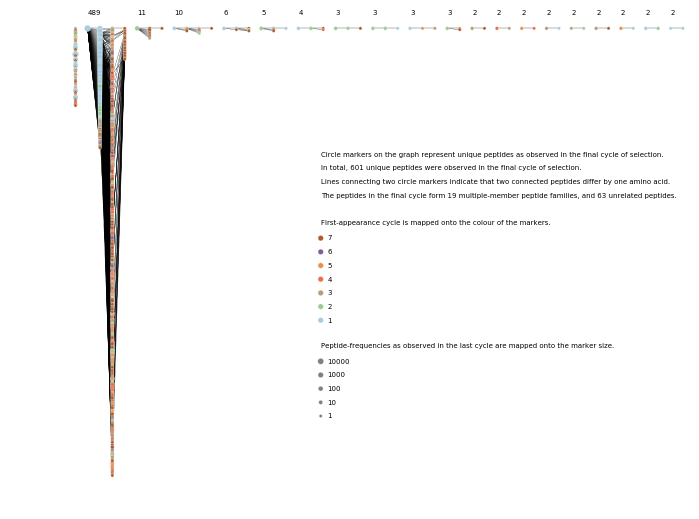

In [18]:
DataFolderLocation = '/Users/nikita/Documents/DataSequensing/SelectionBias/MockSelection/SetOne/SequencingResults'
BaseSelectionRoundNumber = 6
TopNPeptidesNumber = 24
SummaryFileName = 'TopSequenceMockSelection'

PeptidesSummaryDNAPerspectiveReport(DataFolderLocation, BaseSelectionRoundNumber, SummaryFileName)